# Model Training

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
#modeling 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor
import warnings

In [55]:
df=pd.read_csv("/Users/ravina/Desktop/StudentsPerformance (1).csv")

In [56]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [57]:
X=df.drop(columns=['math score'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [59]:
print("categories in 'gender' variable: ", end=" ")
print(df["gender"].unique())

print("categories in 'race/ethnicity' variable: ", end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())


categories in 'gender' variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test preparation course' variable:  ['none' 'completed']


In [60]:
y=df["math score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [61]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

In [62]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer   
"""ColumnTransformer  is used to combine the working of both the OneHotEncoder and StandardScaler.
where, first onehotencoding is applied to transfrom the categorical features into neumeric variables
the standardscalar is applied to the all columns and both processings are combined by the ColumnTransformer, by creating a pipeline."""
neumeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",neumeric_transformer,num_features),
    ]
)

In [63]:
X=preprocessor.fit_transform(X)

In [64]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [65]:
X.shape

(1000, 19)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=6)
X_train.shape, X_test.shape

((750, 19), (250, 19))

Let's create an evaluation function to give all the metrics after model training

In [68]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    r2= r2_score(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    return mae,mse,rmse,r2

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [73]:
models={
    'LinearRegression':LinearRegression(),
    "RidgeRegression": Ridge(),
    "Lasso":Lasso(),
    "DecesionTree_regressor":DecisionTreeRegressor(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "KNN":KNeighborsRegressor(),
    "XGBregressor": XGBRegressor(),
    "AdaboostRegressor":AdaBoostRegressor(),
    "CatboostingRegressor":CatBoostRegressor(verbose=False)

}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)   #training the model

    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)


    #Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predict)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predict)
   
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("model performance for training set")
    print(f"Root mean squared error:{model_train_rmse:.4f}")
    print(f"Mean absolute error:{model_train_mae:.4f}")
    print(f"R2_score:{model_train_r2:.4f}")

    print(" --------------------------------------------------------- ")

    print("model performance for test set")
    print(f"Root mean squared error:{model_test_rmse:.4f}")
    print(f"Mean absolute error:{model_test_mae:.4f}")
    print(f"R2_score:{model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')
    





    

LinearRegression
model performance for training set
Root mean squared error:5.2870
Mean absolute error:4.2329
R2_score:0.8740
 --------------------------------------------------------- 
model performance for test set
Root mean squared error:5.6421
Mean absolute error:4.4502
R2_score:0.8724


RidgeRegression
model performance for training set
Root mean squared error:5.2350
Mean absolute error:4.1929
R2_score:0.8765
 --------------------------------------------------------- 
model performance for test set
Root mean squared error:5.6169
Mean absolute error:4.4415
R2_score:0.8735


Lasso
model performance for training set
Root mean squared error:6.4770
Mean absolute error:5.1153
R2_score:0.8109
 --------------------------------------------------------- 
model performance for test set
Root mean squared error:7.0074
Mean absolute error:5.5648
R2_score:0.8032


DecesionTree_regressor
model performance for training set
Root mean squared error:0.4626
Mean absolute error:0.0387
R2_score:0.9990
 

# Results

In [75]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name',"R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,model name,R2_Score
1,RidgeRegression,0.873540
0,LinearRegression,0.872402
8,CatboostingRegressor,0.846301
4,RandomForest_Regressor,0.836982
6,XGBregressor,0.822947
7,AdaboostRegressor,0.803522
2,Lasso,0.803176
5,KNN,0.766399
3,DecesionTree_regressor,0.731200


# Linear Regression

In [77]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f" %score)

Accuracy of the model is 87.240162


# Plot Y_pred, y_test

Text(0, 0.5, 'predicted')

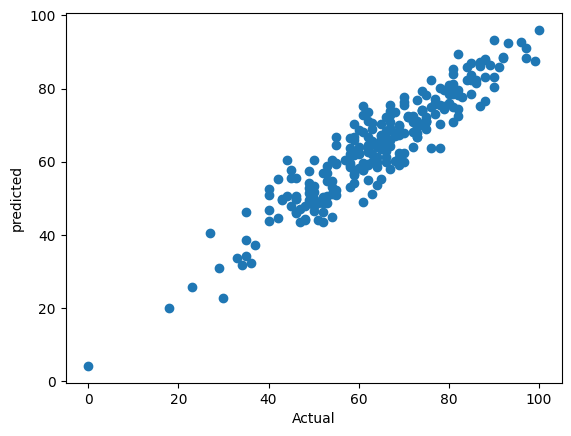

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

<Axes: xlabel='math score'>

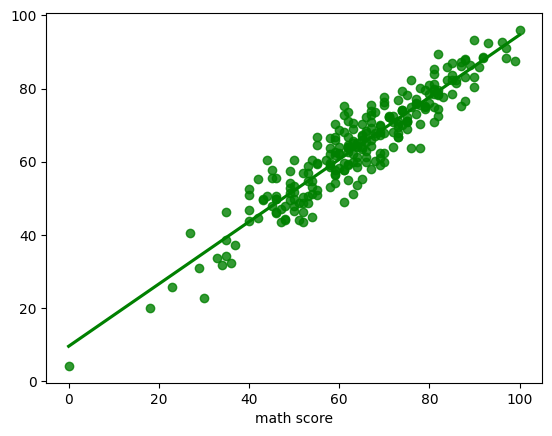

In [80]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

# Difference between actual and predicted values

In [82]:
pred_df=pd.DataFrame({"Actual Values":y_test, "predicted_values":y_pred, "difference":y_test-y_pred})
pred_df.head()

,Actual Values,predicted_values,difference
978,55,50.875,4.125
22,44,60.500,-16.500
909,70,75.375,-5.375
399,60,62.250,-2.250
438,70,60.000,10.000
